<a href="https://colab.research.google.com/github/2303a51060Nirnaya/ADM-2025/blob/main/week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy .stats import zscore

In [84]:
#create dataset
data = {'Values': [10, 12, 14, 18, 21, 23, 23, 24, 25, 28, 30,200]}
df = pd.DataFrame(data)

In [85]:
#z-score method
df['Z-Score'] = zscore(df['Values'])
outliers_z = df[(df['Z-Score'] > 3) | (df['Z-Score'] < -3)]
print("Outliers using Z-Score Method:\n", outliers_z)

Outliers using Z-Score Method:
     Values   Z-Score
11     200  3.293113


In [86]:
#IQR method
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['Values'] < lower_bound) | (df['Values'] > upper_bound)]
print("Outliers using IQR Method:\n", outliers_iqr)

Outliers using IQR Method:
     Values   Z-Score
11     200  3.293113


In [87]:
#capping
df['Values_Capped'] = np.where(df['Values'] > upper_bound, upper_bound, np.where(df['Values'] < lower_bound, lower_bound, df['Values']))

In [88]:
df

,Values,Z-Score,Values_Capped
0,10,-0.514340,10.000
1,12,-0.474262,12.000
2,14,-0.434183,14.000
3,18,-0.354026,18.000
4,21,-0.293909,21.000
5,23,-0.253830,23.000
6,23,-0.253830,23.000
7,24,-0.233791,24.000
8,25,-0.213752,25.000
9,28,-0.153634,28.000


In [89]:
#removal
df_removed_outliers = df[(df['Values'] >= lower_bound) & (df['Values'] <= upper_bound)]

In [90]:
df_removed_outliers

,Values,Z-Score,Values_Capped
0,10,-0.514340,10.0
1,12,-0.474262,12.0
2,14,-0.434183,14.0
3,18,-0.354026,18.0
4,21,-0.293909,21.0
5,23,-0.253830,23.0
6,23,-0.253830,23.0
7,24,-0.233791,24.0
8,25,-0.213752,25.0
9,28,-0.153634,28.0


In [91]:
#imputation
df['Values_Imputed'] = np.where(df['Values'] > upper_bound, df['Values'].mean(), np.where(df['Values'] < lower_bound, df['Values'].mean(), df['Values']))

In [92]:
df['Values_Imputed']


,Values_Imputed
0,10.000000
1,12.000000
2,14.000000
3,18.000000
4,21.000000
5,23.000000
6,23.000000
7,24.000000
8,25.000000
9,28.000000


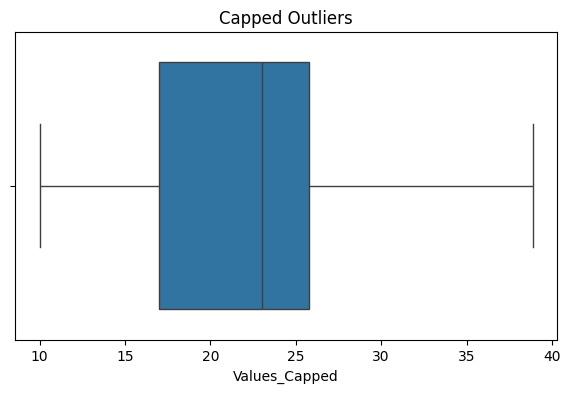

In [93]:
# Capped data
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['Values_Capped'])
plt.title("Capped Outliers")
plt.show()


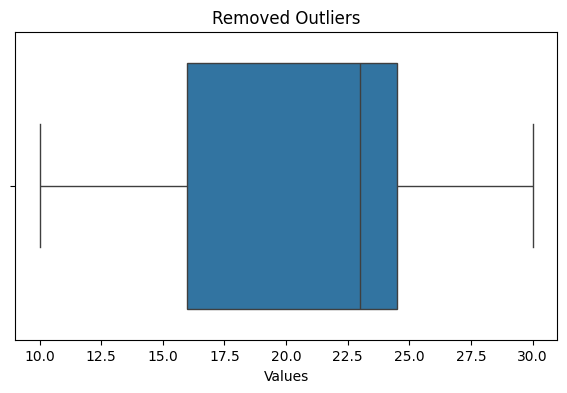

In [94]:
# Removed data
plt.figure(figsize=(7, 4))
sns.boxplot(x=df_removed_outliers['Values'])
plt.title("Removed Outliers")
plt.show()

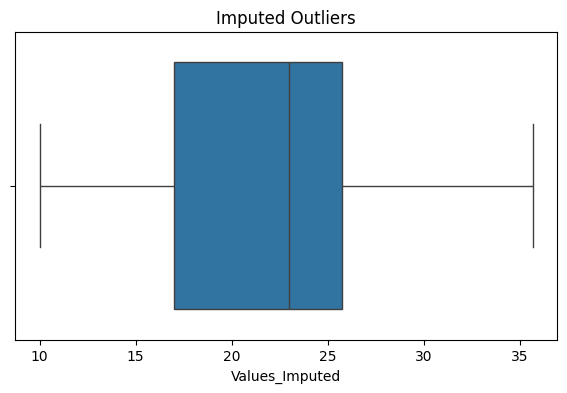

In [95]:
# Imputed data
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['Values_Imputed'])
plt.title("Imputed Outliers")
plt.show()

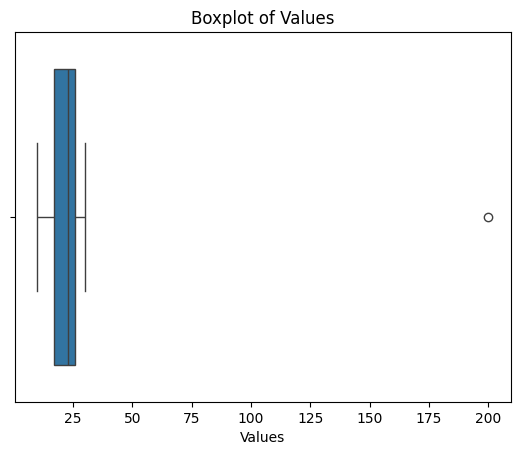

<Figure size 1000x600 with 0 Axes>

In [96]:
#visualize outliers using boxplot
sns.boxplot(x=df['Values'])
plt.title('Boxplot of Values')
plt.figure(figsize=(10,6))
plt.show()